In [22]:
import pandas as pd

train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

train.head()

,ID,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,y
0,TRAIN_00000,1.006187,-1.962566,1.247535,0.926500,-0.265766,-1.789301,0.470004,-0.139467,0.623996,0.320359,0.078612,83.424500
1,TRAIN_00001,1.024647,-2.472625,1.144386,0.846499,-0.287336,-1.756679,0.503860,-0.219545,0.697607,0.238306,0.081778,79.374109
2,TRAIN_00002,1.062444,-2.451003,1.186546,0.873599,-0.257828,-1.802735,0.498045,-0.194247,0.684134,0.259392,0.095003,82.181616
3,TRAIN_00003,1.089189,-2.458470,1.184531,0.810867,-0.276517,-1.787739,0.503359,-0.201923,0.686394,0.245736,0.091737,83.006586
4,TRAIN_00004,1.023323,-2.133468,1.242266,0.939837,-0.264515,-1.792044,0.470478,-0.142896,0.623778,0.314610,0.078987,83.051434


In [23]:
train_X = train.drop(columns=['ID','y'])
train_y = train['y']

train_data = pd.concat([train_X, train_y], axis=1)

In [53]:
from pycaret.regression import setup, compare_models, pull, save_model, load_model, predict_model

regressor = setup(data = train_data, target='y', session_id=42)
best_model = compare_models(n_select=10)
results = pull()

results

,Description,Value
0,Session id,42
1,Target,y
2,Target type,Regression
3,Original data shape,"(40118, 12)"
4,Transformed data shape,"(40118, 12)"
5,Transformed train set shape,"(28082, 12)"
6,Transformed test set shape,"(12036, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,1.2057,2.8778,1.6879,0.6054,0.0220,0.0146,0.0600
lr,Linear Regression,1.2057,2.8779,1.6879,0.6053,0.0220,0.0146,0.9710
gbr,Gradient Boosting Regressor,1.2082,2.8856,1.6902,0.6043,0.0220,0.0146,4.4510
ridge,Ridge Regression,1.2080,2.8875,1.6908,0.6040,0.0220,0.0146,0.0550
lightgbm,Light Gradient Boosting Machine,1.2128,2.9023,1.6953,0.6019,0.0221,0.0147,1.3530
huber,Huber Regressor,1.2009,2.9292,1.7034,0.5982,0.0221,0.0145,0.2950
lar,Least Angle Regression,1.2256,2.9415,1.7070,0.5965,0.0222,0.0148,0.0620
et,Extra Trees Regressor,1.2380,2.9828,1.7190,0.5907,0.0223,0.0150,3.0290
rf,Random Forest Regressor,1.2361,2.9976,1.7231,0.5888,0.0224,0.0150,11.1020
omp,Orthogonal Matching Pursuit,1.3052,3.2432,1.7936,0.5546,0.0231,0.0158,0.0640


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,1.2057,2.8778,1.6879,0.6054,0.0220,0.0146,0.060
lr,Linear Regression,1.2057,2.8779,1.6879,0.6053,0.0220,0.0146,0.971
gbr,Gradient Boosting Regressor,1.2082,2.8856,1.6902,0.6043,0.0220,0.0146,4.451
ridge,Ridge Regression,1.2080,2.8875,1.6908,0.6040,0.0220,0.0146,0.055
lightgbm,Light Gradient Boosting Machine,1.2128,2.9023,1.6953,0.6019,0.0221,0.0147,1.353
huber,Huber Regressor,1.2009,2.9292,1.7034,0.5982,0.0221,0.0145,0.295
lar,Least Angle Regression,1.2256,2.9415,1.7070,0.5965,0.0222,0.0148,0.062
et,Extra Trees Regressor,1.2380,2.9828,1.7190,0.5907,0.0223,0.0150,3.029
rf,Random Forest Regressor,1.2361,2.9976,1.7231,0.5888,0.0224,0.0150,11.102
omp,Orthogonal Matching Pursuit,1.3052,3.2432,1.7936,0.5546,0.0231,0.0158,0.064


In [87]:
from sklearn.preprocessing import StandardScaler

importance_dict = {}

for i, model_name in enumerate(top5_models_df['Model']):
    model = best_model[i]  # best_model에서 해당 모델 객체를 가져옴
    
    # 모델을 저장하고 다시 불러옴
    save_model(model, model_name)
    loaded_model = load_model(model_name)
    
    # 피처 중요도 추출
    if hasattr(loaded_model, 'coef_'):
        importance = loaded_model.coef_
    elif hasattr(loaded_model, 'feature_importances_'):
        importance = loaded_model.feature_importances_
    else:
        print(f"Skipping model {model_name} due to missing importance attributes.")
        continue
    
    # 피처 중요도를 딕셔너리에 저장
    importance_dict[f"importance_{i}"] = pd.DataFrame({
        'feature': train_X.columns,
        'importance': importance
    })
    
    print(model_name)
    
    scaler = StandardScaler()
    normalized_importance = scaler.fit_transform(importance.reshape(-1,1)).flatten()
    
    importance_dict[f"importance_{i}"]['normalized_importance'] = normalized_importance
    
    display(importance_dict[f"importance_{i}"])

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded
Huber Regressor


,feature,importance,normalized_importance
0,x_0,1.488412,-0.378351
1,x_1,-2.398026,-0.716170
2,x_2,13.686757,0.681959
3,x_3,2.550124,-0.286065
4,x_4,-5.960358,-1.025817
5,x_5,20.548450,1.278394
6,x_6,16.984987,0.968649
7,x_7,16.127438,0.894109
8,x_8,-4.595133,-0.907148
9,x_9,20.012726,1.231828


Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded
Bayesian Ridge


,feature,importance,normalized_importance
0,x_0,1.504731,-0.372034
1,x_1,-2.422057,-0.706101
2,x_2,13.883670,0.681091
3,x_3,2.538804,-0.284061
4,x_4,-5.258068,-0.947372
5,x_5,20.540493,1.247414
6,x_6,17.488199,0.987743
7,x_7,16.135214,0.872639
8,x_8,-4.168619,-0.854688
9,x_9,20.230122,1.221009


Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded
Linear Regression


,feature,importance,normalized_importance
0,x_0,0.008647,-0.618427
1,x_1,0.008117,-0.622409
2,x_2,0.030540,-0.453836
3,x_3,0.016600,-0.558635
4,x_4,0.006259,-0.636374
5,x_5,0.005797,-0.639847
6,x_6,0.017171,-0.554345
7,x_7,0.038935,-0.390726
8,x_8,0.430341,2.551754
9,x_9,0.245008,1.158474


Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded
Ridge Regression


,feature,importance,normalized_importance
0,x_0,0.916313,-0.250325
1,x_1,-1.339099,-0.495905
2,x_2,8.819283,0.610191
3,x_3,3.111924,-0.011255
4,x_4,-12.791898,-1.742944
5,x_5,13.440291,1.113350
6,x_6,8.023983,0.523595
7,x_7,14.418586,1.219872
8,x_8,-6.877448,-1.098949
9,x_9,15.188423,1.303696


Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded
Gradient Boosting Regressor


,feature,importance,normalized_importance
0,x_0,359,1.300474
1,x_1,356,1.255252
2,x_2,343,1.059290
3,x_3,347,1.119586
4,x_4,248,-0.372738
5,x_5,157,-1.744471
6,x_6,273,0.004111
7,x_7,235,-0.568700
8,x_8,263,-0.146629
9,x_9,204,-1.035994


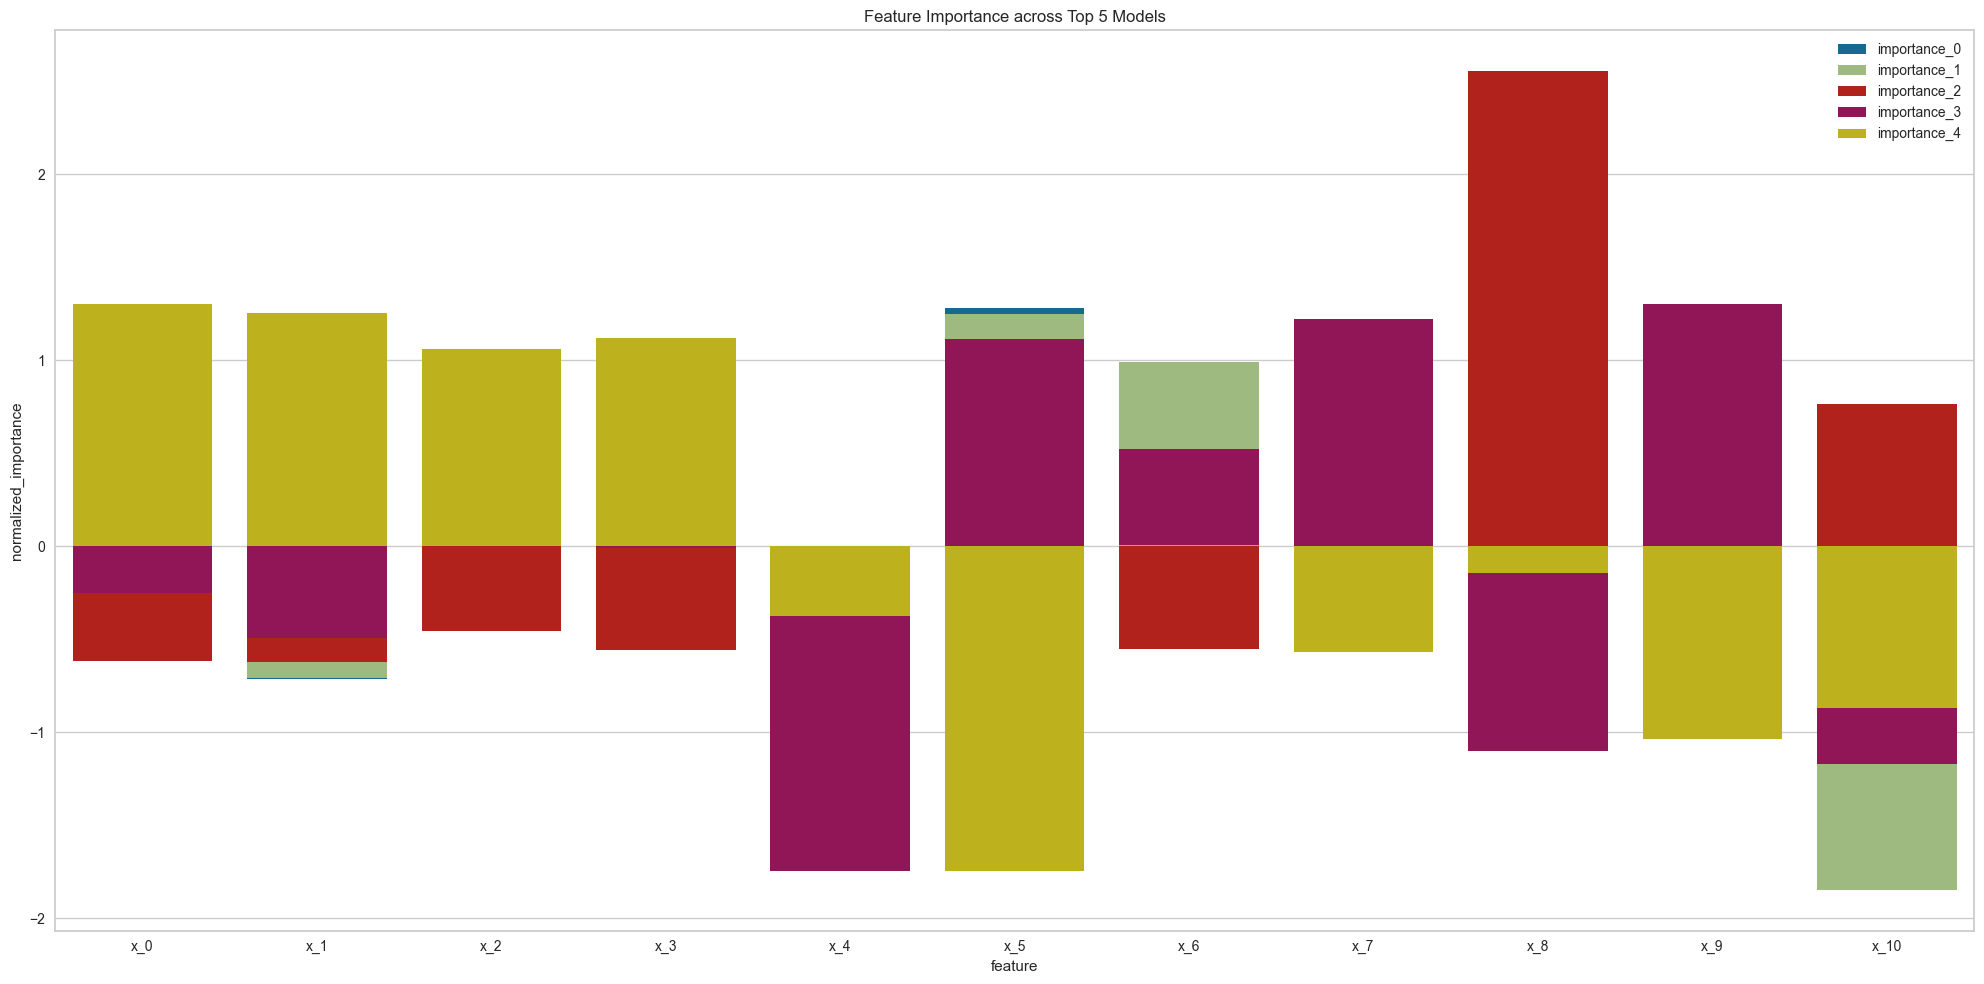

In [88]:
plt.figure(figsize=(20,10))

for i, (key, df) in enumerate(importance_dict.items()):
    sns.barplot(x='feature', y='normalized_importance', data = df, label=key)
   
plt.title('Feature Importance across Top 5 Models') 
plt.tight_layout()
plt.show()